# Service Request Project

## The goal of this project was to perform exploratory data analysis (EDA) on a dataset of Service Requests (311) in NYC after 2010. Additionally, a couple statistical tests were run to investigate any significant variables in determining the time it takes to complete the request.


In [1]:
#importing needed libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats


#importing dataset into dataframe. Specified data type manually due to error message
raw = pd.read_csv('311_Service_Requests.csv', dtype = {'Ferry Direction' : str, "Ferry Terminal Name" : str})

#check the size of the dataset
print(raw.shape)

(364558, 53)


In [2]:
#visualize the first 5 rows of the dataset
raw.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
#visualize the last 10 rows of the dataset
raw.tail(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364548,29613386,01/01/2015 12:08:34 AM,01/01/2015 02:42:23 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10467.0,800 EAST 219 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.882518,-73.859512,"(40.88251771805485, -73.85951186951999)"
364549,29610965,01/01/2015 12:08:02 AM,01/01/2015 01:17:43 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11368.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.738847,-73.863752,"(40.73884743426441, -73.86375174412073)"
364550,29610950,01/01/2015 12:06:43 AM,01/01/2015 06:05:18 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10473.0,616 COMMONWEALTH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.817326,-73.864866,"(40.81732633482385, -73.8648663962995)"
364551,29607567,01/01/2015 12:06:02 AM,01/01/2015 12:43:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10453.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848639,-73.911679,"(40.84863947227845, -73.91167941229558)"
364552,29610051,01/01/2015 12:05:05 AM,01/01/2015 01:22:10 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10002.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721235,-73.987770,"(40.72123468734571, -73.98777023226815)"
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


In [4]:
#column titles of the dataset
raw.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
#variables (columns) with null values and how many in each column
raw.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

Text(0.5, 1.0, 'Total Null Values in Columns with at Least 1 Null Value')

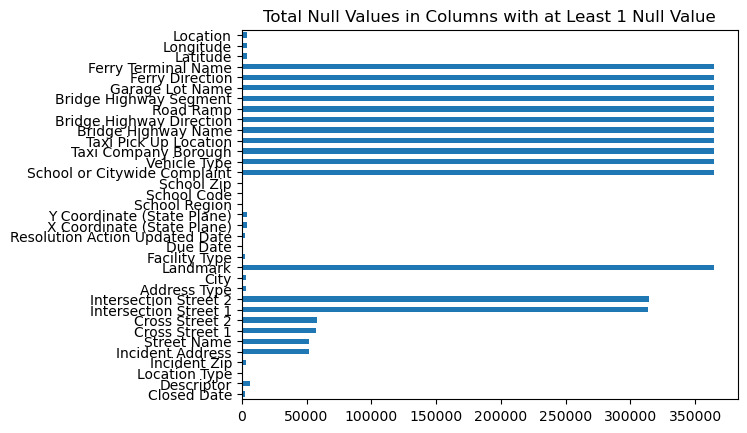

In [6]:
#bar graph to show number of null values in each columnn of the dataframe using pyplot
naplotdata = raw.isna().sum()
nozerodata = naplotdata[naplotdata > 0]


nozerodata.plot(kind = 'barh')
plt.title('Total Null Values in Columns with at Least 1 Null Value')


In [7]:
#missing value treatment

#removing the records whose Closed Date values are null
raw = raw.dropna(subset = 'Closed Date')
raw.shape


(362177, 53)

In [9]:
#analysis of the Date columns - converting dates into datetime formats

raw['Created Date'] = pd.to_datetime(raw['Created Date'])
raw['Closed Date'] = pd.to_datetime(raw['Closed Date'])

In [10]:
#check that object to datetime conversion is correct
raw.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [12]:
#check if any dates are before 2010 (outside of the timeline)
raw[raw['Created Date']<'2010-01-01']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [13]:
#check if any dates are after 2023 (outside of timeline)
raw[raw['Created Date']>'2023-01-01']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [15]:
#creating a column with the time elapsed for service request to be completed

raw['Elapsed Time'] = raw['Closed Date'] - raw['Created Date']

In [16]:
#converting Elapsed Time to seconds into a new column Elapsed Time (sec)

raw['Elapsed Time (sec)'] = raw['Elapsed Time']/np.timedelta64(1, 's')

In [17]:
#descriptive statistics of Elapsed Time (sec) using apply lambda to change format output to float from scientific notation
#for readibility and ease of comparison

raw['Elapsed Time (sec)'].describe().apply(lambda x: format(x, 'f'))

count     362177.000000
mean       15113.299633
std        21102.547520
min           61.000000
25%         4533.000000
50%         9616.000000
75%        18878.000000
max      2134342.000000
Name: Elapsed Time (sec), dtype: object

In [18]:
#checking number of null values in Complaint_Type and City columns

raw[['Complaint Type', 'City']].isna().sum()

Complaint Type      0
City              674
dtype: int64

In [19]:
#imputing null City values with Unknown City

raw['City'] = raw['City'].fillna('Unknown City')

In [20]:
#checking that the imputation correctly returns previous number of null values

raw['City'].value_counts()['Unknown City']

674

Text(0.5, 1.0, 'Frequency of Complaints by City')

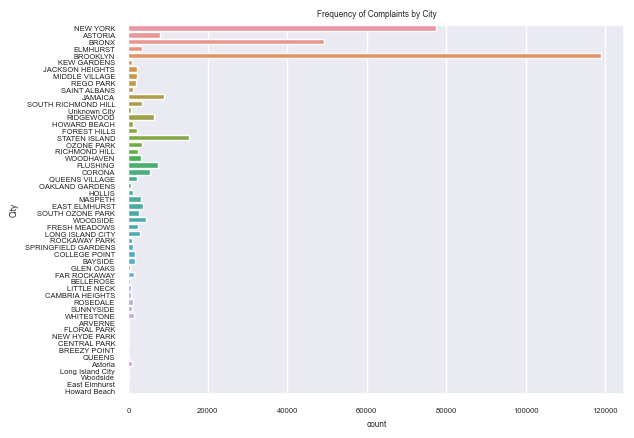

In [21]:
#frequency plot of complaints by City. Showing seaborn countplot rather than pandas .plot()

sns.set(font_scale = 0.5)
sns.countplot(y='City', data=raw)
plt.title('Frequency of Complaints by City')

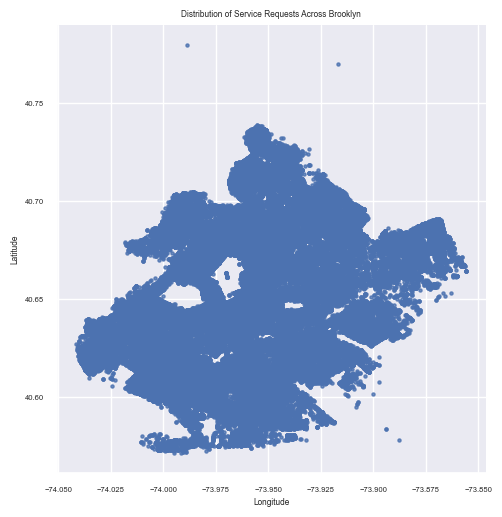

In [22]:
#scatterplot of request concentration across Brooklyn using X and Y coordinates
#taking off trend line and decreasing point size

sns.lmplot(data = raw.loc[raw['City'] == 'BROOKLYN'], x = 'Longitude', 
           y = 'Latitude', fit_reg=False, scatter_kws={'s':5}).set(title='Distribution of Service Requests Across Brooklyn')

Text(0.5, 0.98, 'Distribution of Service Requests Across Brooklyn')

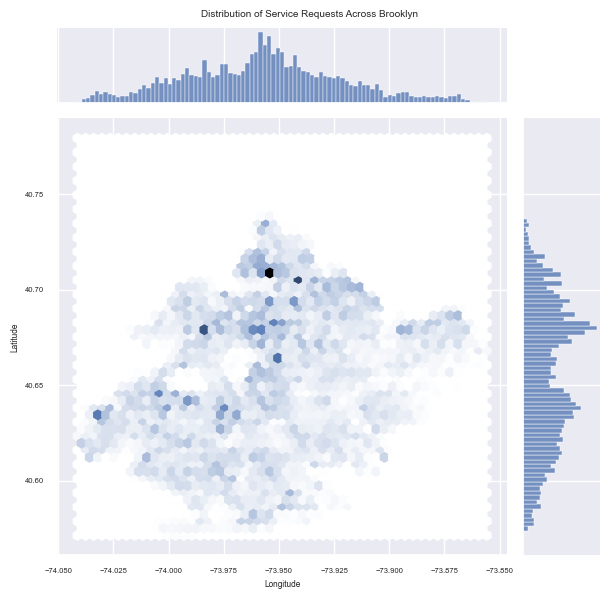

In [23]:
#hexbin (jointplot) of request concentration across Brooklyn using X and Y coordinates

hexBrook = sns.jointplot(data = raw.loc[raw['City'] == 'BROOKLYN'], x = 'Longitude', 
              y = 'Latitude', kind = 'hex')

#adjust title height
hexBrook.fig.subplots_adjust(top=.95)
#add title
hexBrook.fig.suptitle('Distribution of Service Requests Across Brooklyn')

Text(0.5, 1.0, 'Frequency of Complaint Types')

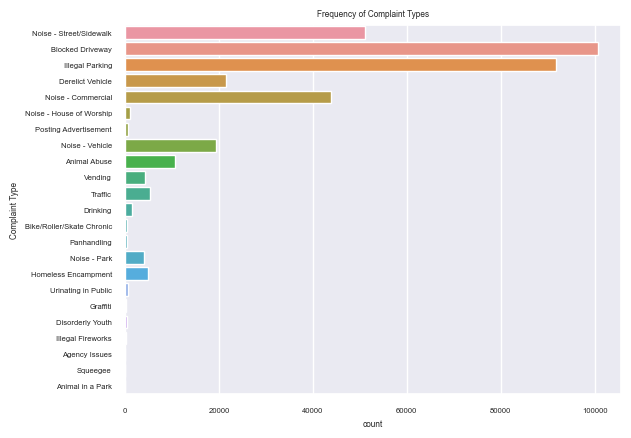

In [24]:
#finding major types of complaints
#bar graph showing types of complaints

sns.countplot(data=raw, y='Complaint Type')
plt.title('Frequency of Complaint Types')

In [25]:
#checking frequency of various complaints in New York City in particular

nycraw = raw[raw['City'] == "NEW YORK"]
nycraw['Complaint Type'].value_counts()

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64

In [26]:
#top 10 complaint types for all cities
raw['Complaint Type'].value_counts().nlargest(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

In [27]:
#creating new dataframe with City as columns and Complaint Type as rows
#displays various complaint types in each city

df_new = pd.crosstab(index=raw["Complaint Type"], columns=raw["City"])
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,...,74,40,42,786,40,1,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,...,1,1,0,10,2,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36445,177,0,...,1202,1946,330,2845,278,86,279,1363,2038,27
Derelict Vehicle,32,426,14,231,120,3,2402,6257,148,0,...,425,356,267,2184,17,63,279,369,298,8
Disorderly Youth,2,5,0,2,2,0,66,79,0,0,...,2,2,0,25,2,0,1,0,1,0
Drinking,1,43,0,1,1,1,206,291,0,0,...,14,25,6,188,12,3,3,4,15,0
Graffiti,1,4,0,3,0,0,15,60,0,0,...,2,0,0,6,1,0,1,0,4,0


Text(0.5, 1.0, 'Complaint Type Distribution by City')

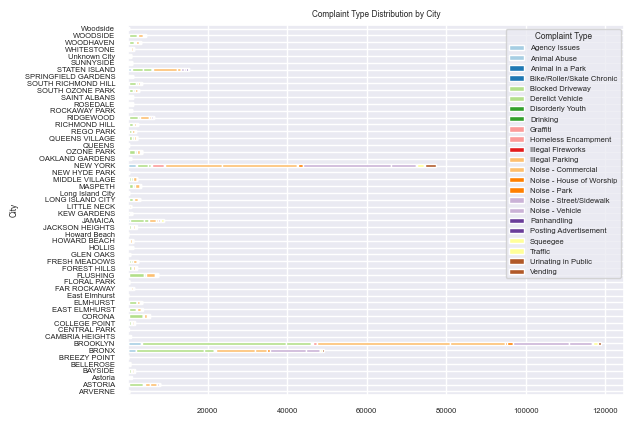

In [28]:
#graph showing the different types of complaints in each City (complaints in color)

citytype= pd.crosstab(index=raw["City"], columns=raw["Complaint Type"])
citytype.plot(kind='barh', stacked=True, colormap="Paired")
plt.title('Complaint Type Distribution by City')


In [29]:
#create new dataframe of Elapsed Time (sec), City, Complaint Type
#intention is to check if average response time varies across complaint types

responseData = raw[['City', 'Complaint Type', 'Elapsed Time (sec)']]
responseData

,City,Complaint Type,Elapsed Time (sec)
0,NEW YORK,Noise - Street/Sidewalk,3330.0
1,ASTORIA,Blocked Driveway,5233.0
2,BRONX,Blocked Driveway,17494.0
3,BRONX,Illegal Parking,27927.0
4,ELMHURST,Illegal Parking,12464.0
...,...,...,...
364553,WOODHAVEN,Illegal Parking,37067.0
364554,BRONX,Noise - Vehicle,8434.0
364555,NEW YORK,Noise - Street/Sidewalk,1143.0
364556,BRONX,Blocked Driveway,9653.0


In [30]:
#group Complaint Type by City and show average Elapsed Time to complete service request

pd.options.display.max_rows = None
responseData.groupby(['City','Complaint Type']).mean().astype(str)

Elapsed Time (sec)
City                Complaint Type                               
ARVERNE             Animal Abuse                8399.195652173914
                    Blocked Driveway                      8318.84
                    Derelict Vehicle                      11394.0
                    Disorderly Youth                      12928.5
                    Drinking                                859.0
                    Graffiti                               5508.0
                    Homeless Encampment                   6541.25
                    Illegal Parking              8406.08064516129
                    Noise - Commercial                     8234.0
                    Noise - House of Worship    6653.428571428572
                    Noise - Park                           4638.0
                    Noise - Street/Sidewalk     7173.206896551724
                    Noise - Vehicle                        5673.6
                    Panhandling                            3673.0
                    Traffic                                4014.0
                    Urinating in Public                    2491.0
                    Vending                                1735.0
ASTORIA             Animal Abuse               17206.882352941175
                    Bike/Roller/Skate Chronic             6718.75
                    Blocked Driveway           16515.934516880094
                    Derelict Vehicle           32446.598591549297
                    Disorderly Youth                       9713.8
                    Drinking                   15518.279069767443
                    Graffiti                             50742.25
                    Homeless Encampment                17704.3125
                    Illegal Fireworks                     9979.25
                    Illegal Parking            16910.147014925373
                    Noise - Commercial         10994.572897761645
                    Noise - House of Worship    6931.047619047619
                    Noise - Park                      11063.96875
                    Noise - Street/Sidewalk     12228.19804400978
                    Noise - Vehicle             12734.93220338983
                    Panhandling                           16282.5
                    Posting Advertisement      22951.666666666668
                    Traffic                    17423.683333333334
                    Urinating in Public                   15886.6
                    Vending                     18273.43859649123
Astoria             Blocked Driveway           16492.861635220124
                    Derelict Vehicle           25032.428571428572
                    Illegal Parking            16156.028880866426
                    Noise - Commercial         12405.148387096775
                    Noise - Street/Sidewalk    12907.068965517241
BAYSIDE             Animal Abuse               11203.547169811322
                    Blocked Driveway            9345.945525291829
                    Derelict Vehicle           12261.627705627705
                    Disorderly Youth                       9338.5
                    Drinking                               6848.0
                    Graffiti                   16381.333333333334
                    Homeless Encampment                   10342.5
                    Illegal Parking             9070.040752351097
                    Noise - Commercial           8289.04255319149
                    Noise - House of Worship   16136.666666666666
                    Noise - Park                         11783.75
                    Noise - Street/Sidewalk     5334.941176470588
                    Noise - Vehicle             5621.833333333333
                    Traffic                     5500.888888888889
                    Vending                                6760.5
BELLEROSE           Animal Abuse                          31969.2
                    Bike/Roller/Skate Chronic             17616.0
                    B

In [31]:
#creating new DataFrame to just show average elapsed time for each complaint type
complaintime = responseData.groupby(['Complaint Type'], as_index=False).mean()
complaintime

,Complaint Type,Elapsed Time (sec)
0,Agency Issues,1.828912e+04
1,Animal Abuse,1.803256e+04
2,Animal in a Park,1.212634e+06
3,Bike/Roller/Skate Chronic,1.312369e+04
4,Blocked Driveway,1.623252e+04
5,Derelict Vehicle,2.535960e+04
6,Disorderly Youth,1.236375e+04
7,Drinking,1.382130e+04
8,Graffiti,2.327634e+04
9,Homeless Encampment,1.545138e+04


Text(0.5, 1.0, 'Elapsed Time to Close Service Request by Complaint Type')

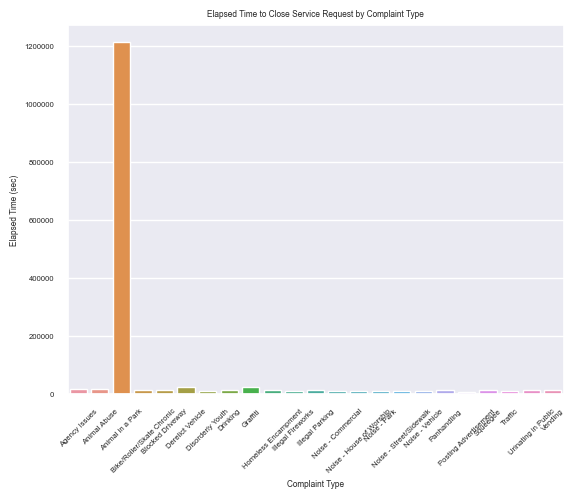

In [32]:
#graphing the above DataFrame to compare average time taken to resolve a request between complaint types

sns.barplot(data=complaintime, x='Complaint Type', y='Elapsed Time (sec)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Elapsed Time to Close Service Request by Complaint Type')

In [33]:
#remove Animal in Park Complaint Type to re-check distribution
complaintime2 = complaintime.drop([2])
complaintime2

,Complaint Type,Elapsed Time (sec)
0,Agency Issues,18289.125000
1,Animal Abuse,18032.556030
3,Bike/Roller/Skate Chronic,13123.688421
4,Blocked Driveway,16232.521516
5,Derelict Vehicle,25359.600102
6,Disorderly Youth,12363.749206
7,Drinking,13821.300570
8,Graffiti,23276.343949
9,Homeless Encampment,15451.384505
10,Illegal Fireworks,10113.482558


Text(0.5, 1.0, 'Elapsed Time to Close Service Request by Complaint Type')

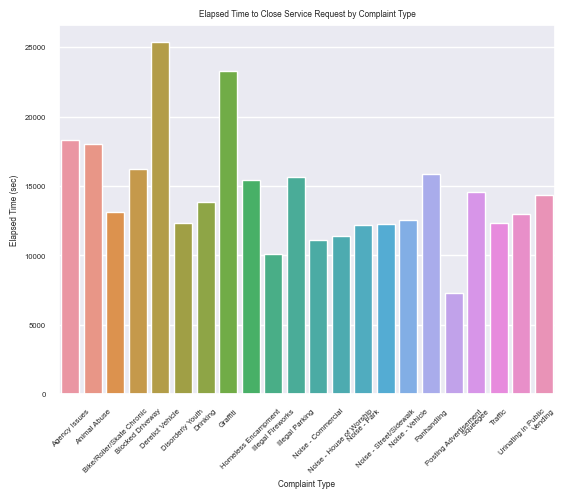

In [34]:
#graph distribution with Animal in Park dropped

sns.barplot(data=complaintime2, x='Complaint Type', y='Elapsed Time (sec)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Elapsed Time to Close Service Request by Complaint Type')

In [35]:
#comparison of means test (ANOVA) for all Complaint Types
stats.f_oneway(responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Agency Issues'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Animal Abuse'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Animal in a Park'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Bike/Roller/Skate Chronic'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Blocked Driveway'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Derelict Vehicle'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Disorderly Youth'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Drinking'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Graffiti'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Homeless Encampment'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Illegal Fireworks'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Illegal Parking'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Noise - Commercial'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Noise - House of Worship'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Noise - Park'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Noise - Street/Sidewalk'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Noise - Vehicle'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Panhandling'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Posting Advertisement'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Squeegee'],          
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Traffic'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Urinating in Public'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Vending']              
              )

F_onewayResult(statistic=565.2615700417628, pvalue=0.0)

## ANOVA interpretation: reject null hypothesis because p-value<0.05. At least one Complaint Type group differs significantly.


In [36]:
#Kruskal-Wallis H Test
stats.kruskal(responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Agency Issues'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Animal Abuse'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Animal in a Park'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Bike/Roller/Skate Chronic'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Blocked Driveway'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Derelict Vehicle'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Disorderly Youth'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Drinking'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Graffiti'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Homeless Encampment'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Illegal Fireworks'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Illegal Parking'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Noise - Commercial'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Noise - House of Worship'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Noise - Park'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Noise - Street/Sidewalk'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Noise - Vehicle'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Panhandling'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Posting Advertisement'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Squeegee'],          
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Traffic'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Urinating in Public'],
               responseData['Elapsed Time (sec)'][responseData['Complaint Type']=='Vending']              
              )


KruskalResult(statistic=11988.269402358468, pvalue=0.0)

## Kruskal interpretation: reject null hypothesis because p-value<0.05. One or more sample distributions' medians is not equal.

In [70]:
#for loop to run an ANOVA on all Complaint Types separately against the mean of all

uniqueTypes=responseData['Complaint Type'].unique()

for t in uniqueTypes:
    print(t)
    s, p = stats.f_oneway(responseData['Elapsed Time (sec)'][responseData['Complaint Type'] == t],
                  responseData['Elapsed Time (sec)'])
    if p<0.05:
        print("The p-value for ", t, "is: ",p)
    else:
        print("The ANOVA for ", t, "is statistically insignificant.")
 

Noise - Street/Sidewalk
The p-value for  Noise - Street/Sidewalk is:  1.8816940468126975e-187
Blocked Driveway
The p-value for  Blocked Driveway is:  1.6159916194237022e-52
Illegal Parking
The p-value for  Illegal Parking is:  4.154525537889026e-12
Derelict Vehicle
The p-value for  Derelict Vehicle is:  0.0
Noise - Commercial
The p-value for  Noise - Commercial is:  4.9e-322
Noise - House of Worship
The p-value for  Noise - House of Worship is:  8.432607319794917e-09
Posting Advertisement
The p-value for  Posting Advertisement is:  4.346909898855285e-22
Noise - Vehicle
The p-value for  Noise - Vehicle is:  1.8281897697741582e-61
Animal Abuse
The p-value for  Animal Abuse is:  1.4394553240105054e-43
Vending
The p-value for  Vending is:  0.022509428760841988
Traffic
The p-value for  Traffic is:  1.5596037810939687e-21
Drinking
The p-value for  Drinking is:  0.021977339864342756
Bike/Roller/Skate Chronic
The p-value for  Bike/Roller/Skate Chronic is:  0.03995844859860901
Panhandling
The A

In [80]:
#for loop to run a Kruskal on all Complaint Types separately against the mean of all

for t in uniqueTypes:
    print(t)
    s, p = stats.kruskal(responseData['Elapsed Time (sec)'][responseData['Complaint Type'] == t],
                  responseData['Elapsed Time (sec)'])
    if p<0.05:
        print("The p-value for ", t, "is: ",p)
    else:
        print("The Kruskal-Wallis H Test for ", t, "is statistically insignificant.")
 

Noise - Street/Sidewalk
The p-value for  Noise - Street/Sidewalk is:  0.0
Blocked Driveway
The p-value for  Blocked Driveway is:  0.0
Illegal Parking
The p-value for  Illegal Parking is:  9.741214904521316e-55
Derelict Vehicle
The p-value for  Derelict Vehicle is:  0.0
Noise - Commercial
The p-value for  Noise - Commercial is:  0.0
Noise - House of Worship
The p-value for  Noise - House of Worship is:  6.930181176361173e-24
Posting Advertisement
The p-value for  Posting Advertisement is:  2.803234449006454e-70
Noise - Vehicle
The p-value for  Noise - Vehicle is:  8.405737110084953e-106
Animal Abuse
The p-value for  Animal Abuse is:  8.357777072833736e-81
Vending
The Kruskal-Wallis H Test for  Vending is statistically insignificant.
Traffic
The p-value for  Traffic is:  1.2016530910591436e-85
Drinking
The Kruskal-Wallis H Test for  Drinking is statistically insignificant.
Bike/Roller/Skate Chronic
The p-value for  Bike/Roller/Skate Chronic is:  0.006662068093053303
Panhandling
The Krusk